## **About this Script**

This script generates an ANN (artificial neural network) for a diabetes dataset.

This dataset describes the medical records for over 700 female Pima native Americans with 8 characteristics. These covariates include:
*   preg = Number of times pregnant
*   plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
*   pres = Diastolic blood pressure (mm Hg)
*   skin = Triceps skin fold thickness (mm)
*   test = 2-Hour serum insulin (mu U/ml)
*   mass = Body mass index (weight in kg/(height in m)^2)
*   pedi = Diabetes pedigree function
*   age = Age (years)
The outcome variable is yes/1/diabetes or no/0/no diabetes

If you have questions, please contact: maese005@umn.edu


## **Step 1:** Get Data

Here, we will read a CSV file from github into R (Google Collab) using the **RCurl** R package.

Note: in order to do so, you must provide a link to the raw text file in github (otherwise, this won't work). 

Here is the link to the github which stores the data: https://github.com/maese005/GLBIO-2021

The data was originally obtained from Kaggle: https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

This dataset is also packaged in R: https://www.rdocumentation.org/packages/pdp/versions/0.7.0/topics/pima

In [ ]:
install.packages('curl')
library(curl)
x <- read.csv(curl('https://raw.githubusercontent.com/maese005/GLBIO-2021/ce40994ec799cbebd87cf812b9e7bab95c0c5ffa/Data/pima-indians-diabetes.csv'), header=FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Check dimensions of data.

In [ ]:
dim(x) #768 females, 9 features.

[1] 768   9

## **Step 2:** Normalize the Data

Normalize the data before training the ANN. This will improve the results. 

Here, we create a normalize function that normalizes the data in the range of 0 to 1. 

Normalization is an important procedure to perform when forming a neural network. This adjusts the data to a common scale, allowing you to accurately compare predicted and actual values. 

If you don't normalize your data, you may likely recieve the same prediction value across all observations regardless of input values. 

In R, we can normalize using the scale function in R aka scale(mydata). We can also transform the data (as we do below) using the max-min normalization technique provided. 

In [ ]:
normalize <- function(x) { #Create the function.
 return ((x - min(x)) / (max(x) - min(x)))
}

norm <- as.data.frame(lapply(x, normalize)) #Apply the function that we created above. 
#Here, we use lapply() in order to run our function across our existing data. 
#norm is the name of our scaled dataset. 

colnames(norm) <- c('preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'outcome')

## **Step 3:** Compute a Correlation Matrix

This is important because this helps you determine if there is a strong correlation between any of the variables (which there isn't). If there were, you could drop any of them for analysis...you don't have to use all the different covariates in the ANN...choose the ones that possibly have a greater impact on predictability. 

In [ ]:
cors <- round(cor(norm[1:8]),1)
cors

,preg,plas,pres,skin,test,mass,pedi,age
preg,1.0,0.1,0.1,-0.1,-0.1,0.0,0.0,0.5
plas,0.1,1.0,0.2,0.1,0.3,0.2,0.1,0.3
pres,0.1,0.2,1.0,0.2,0.1,0.3,0.0,0.2
skin,-0.1,0.1,0.2,1.0,0.4,0.4,0.2,-0.1
test,-0.1,0.3,0.1,0.4,1.0,0.2,0.2,0.0
mass,0.0,0.2,0.3,0.4,0.2,1.0,0.1,0.0
pedi,0.0,0.1,0.0,0.2,0.2,0.1,1.0,0.0
age,0.5,0.3,0.2,-0.1,0.0,0.0,0.0,1.0


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



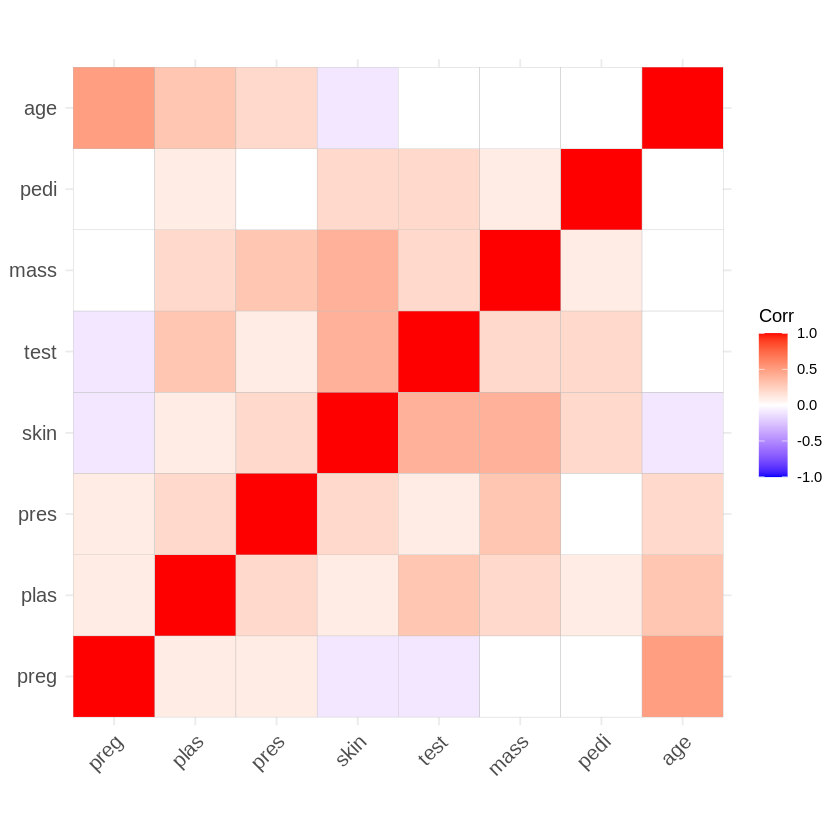

In [ ]:
install.packages('ggcorrplot') #Here is a fancer way to create this matrix. 
library('ggcorrplot')
ggcorrplot(cors)

## **Step 4:** Split Data into Train & Test

Split the normalized data such that 90% of the data is used for training the ANN, and 10% is used for testing the ANN.

One of the easiest ways to split data in R is using the function sample().

In [ ]:
index <- sample(1:nrow(norm),round(0.90*nrow(norm)))
trainset <- norm[index,] # 90% of data for training the neural network
testset <- norm[-index,] # 10% of data for testing the neural network

In [ ]:
colnames(trainset) <- c('preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'outcome')
colnames(testset) <- c('preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'outcome')

In [ ]:
dim(trainset) #691 9
dim(testset) #77 9

[1] 691   9

[1] 77  9

## **Step 5:** Fit the Model

Fit the neural network on the data using neuralnet library. 

Here, you can test whether different numbers of hidden neurons affect the accuracy of the prediction. For each construction, you can calculate the accuracy of the actual vs. the predicted categorization (this is shown in the confusion matrix). Specifically, you can compare the false positive rate to obtain the ratio of correctly predicted diabetes to total prediction. 

You can also calcualte MSE (mean square error) to compare accuracy. The closer this number is to 0, the smaller the error. 

In [ ]:
set.seed(2) #Setting the seed is done to conserve the uniqueness in the predicted dataset. Therefore, the predictions will always be the same for a specific seed. 

nn <- neuralnet(outcome ~ preg+plas+pres+skin+test+mass+pedi+age, data=trainset, hidden=6, linear.output=FALSE, threshold=0.01, lifesign='full') 
#Here, we have 1 hidden layer with 6 neurons. 
#Ex: hidden=c(6,6) gives two hidden layers each with 6 neurons. 

#Here is another helpful R package to use:
#install.packages('nnet')
#library('nnet')

hidden: 6    thresh: 0.01    rep: 1/1    steps: 
   1000	min thresh: 0.0447309538258672
                                                
   2000	min thresh: 0.0447309538258672
                                                
   3000	min thresh: 0.0447309538258672
                                                
   4000	min thresh: 0.0332468753948426
                                                
   5000	min thresh: 0.0330934158952174
                                                
   6000	min thresh: 0.0330934158952174
                                                
   7000	min thresh: 0.0330934158952174
                                                
   8000	min thresh: 0.0330934158952174
                                                
   9000	min thresh: 0.0328598975364879
                                                
  10000	min thresh: 0.0328598975364879
                                                
  11000	min thresh: 0.0326819613906523
                                

From the output above, we can conclude that the model converges.

Our error is 39.28404

Ideally, we want to minimize the error. Therefore, if we were to run the code for 2 or more iterations, use the output obtained from the iteration associated with less error. 

## **Step 6:** Visualize the Network

You can plot the neural network. 

Note: for some reason, this plot is not showing up in Google Collab. 

In [ ]:
plot(nn)

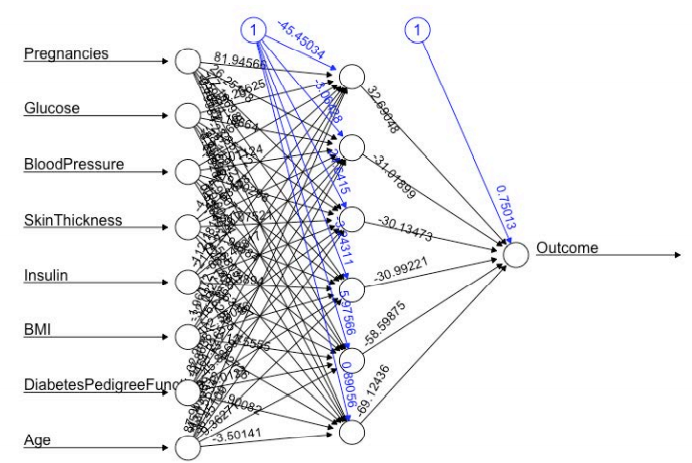

Below is a comparison between model artitechures and accuracy when using 3 hidden nodes/neurons or 6.

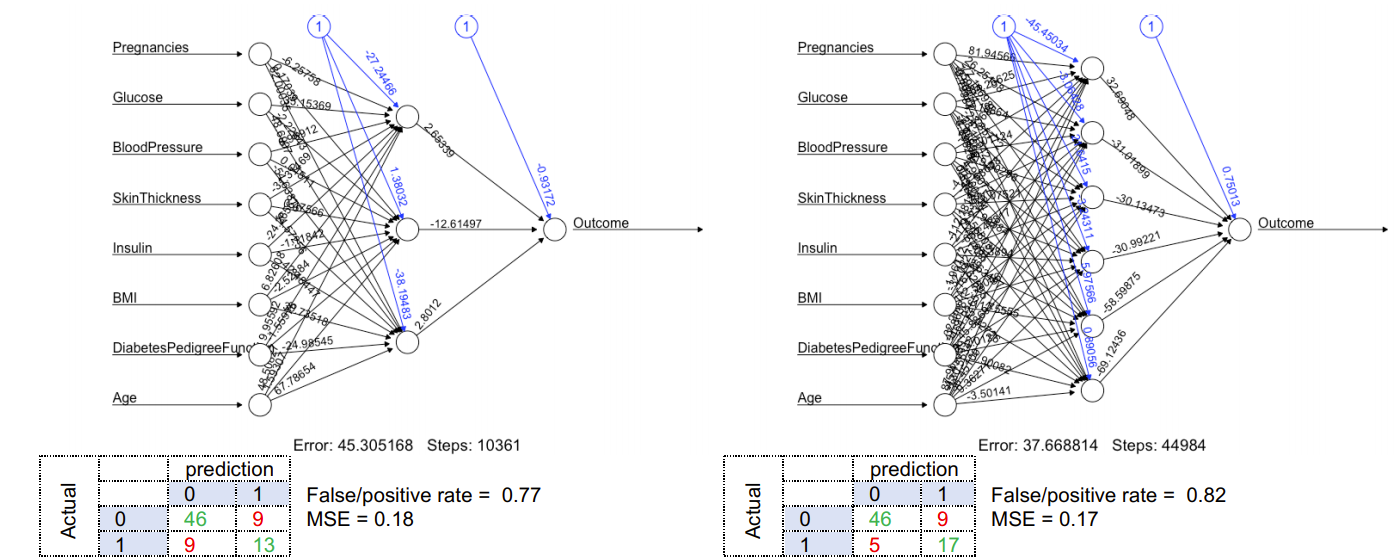

## **Step 7:** Generate a Confusion Matrix

In [ ]:
nn.results <- compute(nn, testset) #The values calcualted by the neural network on the test data can be calculated using predict or compute function. 
results <- data.frame(actual = testset$outcome, prediction = round(nn.results$net.result))
results

,actual,prediction
,<dbl>,<dbl>
6,0,0
37,0,1
42,0,1
46,1,1
54,1,1
61,0,0
63,0,0
76,0,0
97,0,0


In [ ]:
dim(results)
str(results)

[1] 77  2

'data.frame':	77 obs. of  2 variables:
 $ actual    : num  0 0 0 1 1 0 0 0 0 1 ...
 $ prediction: num  0 1 1 1 1 0 0 0 0 1 ...


In [ ]:
install.packages('caret')
install.packages('e1071', dependencies=TRUE)
library('caret')
confusionMatrix(as.factor(results$prediction), as.factor(results$actual))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘mlbench’, ‘randomForest’, ‘SparseM’, ‘xtable’, ‘slam’




Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 35  8
         1 11 23
                                          
               Accuracy : 0.7532          
                 95% CI : (0.6418, 0.8444)
    No Information Rate : 0.5974          
    P-Value [Acc > NIR] : 0.003048        
                                          
                  Kappa : 0.495           
                                          
 Mcnemar's Test P-Value : 0.646355        
                                          
            Sensitivity : 0.7609          
            Specificity : 0.7419          
         Pos Pred Value : 0.8140          
         Neg Pred Value : 0.6765          
             Prevalence : 0.5974          
         Detection Rate : 0.4545          
   Detection Prevalence : 0.5584          
      Balanced Accuracy : 0.7514          
                                          
       'Positive' Class : 0               
                                    